In [1]:
# CellStrat - Intro to Artificial Neural Networks

# Here we look at ANNs using TensorFlow

# We start with Perceptrons first, which are the basic building block of a neural network.

# Ref : “Hands-on Machine Learning with Scikit-Learn and TensorFlow ” by Aurelien Geron

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [7]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# NumPy as Perceptron
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(
        PROJECT_ROOT_DIR,
        'images',
        CHAPTER_ID,
        fig_id + '.png'
    )
    print('Saving figure ', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

CellStrat - Let's build a classification model to classify the IRIS flower dataset using a Perceptron.
This flower can belong to one of the three species Setosa, Versicolor and Virginica.
The IRIS flower dataset has 150 samples of this flower with their features provided as sepal length, sepal width, petal length and petal width. Along with features per sample, the ground truth labels i.e. the species label is also provided in the dataset.
We will first train a Perceptron with this dataset and then use the trained model to predict the class of sample instance having petal length 2 and petal width 0.5

#We will use Perceptron API from the SCIKIT-LEARN library

In [8]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
#X = iris.data[:, (0, 1)]  # sepal length, sepal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [13]:
#X

In [14]:
#y

In [15]:
y_pred

array([1])

CellStrat - the predicted class for petal length = 2 and petal width = 0.5 is the second class i.e. Versicolor. Note that :-
* array([0]) indicates setosa
* array([1]) indicates versicolor
* array([2]) indicates virginica

In [9]:
#CellStrat - Next lets plot the classifier boundary between Setosa and non-Setosa data instances

# let's use numpy linspace to produce some numbers.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)[source]¶
# Return evenly spaced numbers over a specified interval.
# Returns num evenly spaced samples, calculated over the interval [start, stop].

# the ravel command returns contiguous flattened array(1D array with all the input-array elements and with the same type as it).

//anaconda3/envs/nf/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


Saving figure  perceptron_iris_plot


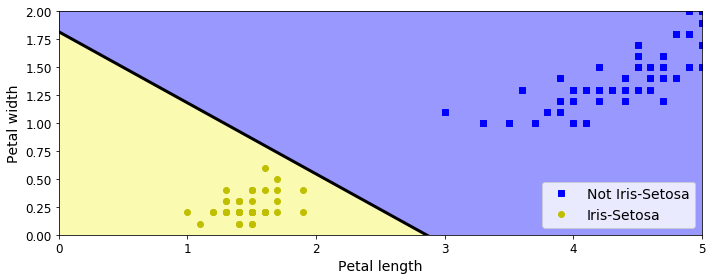

In [12]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
#clf = classifier

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [11]:
#CellStrat - Let's review the activation functions Logistic Sigmoid, ReLU, Step and tanh.

#we will also take derivative of the output of each activation function and plot it
#derivative = change in the output of activation function for a minor change in input value, divided by the quantum of change
#in the input value. i.e. (f(z2)-f(z1))/(z2-z1).

In [17]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure  activation_functions_plot


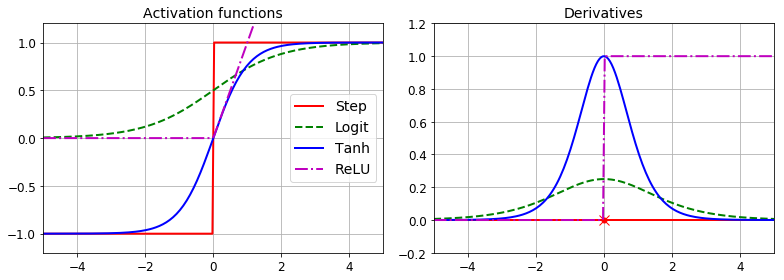

In [18]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

Heaviside step function : https://en.wikipedia.org/wiki/Heaviside_step_function
The Heaviside step function, or the unit step function, usually denoted by H or θ (but sometimes u, 1 or 𝟙), is a discontinuous function named after Oliver Heaviside (1850–1925), whose value is zero for negative argument and one for positive argument. It is an example of the general class of step functions, all of which can be represented as linear combinations of translations of this one.

CellStrat - heaviside is a basic step function returning 0 or 1. mlp_xor below returns the output of a three layer MLP or multi-layer perceptron (Note that XOR requires three layer network, including one hidden layer. XOR cannot be implemented with just with single perceptron)

In [19]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(
        -activation(
            x1 + x2 - 1.5
        )
        + activation(
            x1 + x2 - 0.5
        ) - 0.5)

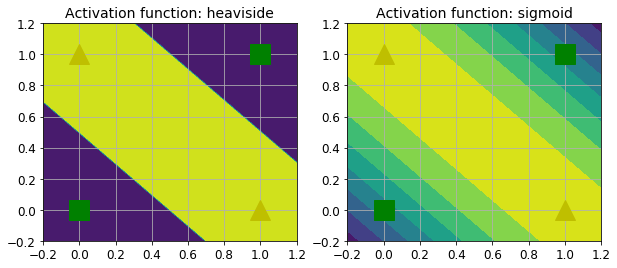

In [20]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

CellStrat - The outputs show that heaviside step function has a clear classifier boundary for XOR data (where only 1 of the 2 features can be positive at a time). Whereas the sigmoid has a gradual transitional boundary as it follows a continuous S-curve transformation.

In [18]:
#CellStrat - END OF PERCEPTRON and ACTIVATION FUNCTIONS chapter

# FNN for MNIST

## using tf.learn

In [22]:
!pip install tensorflow==1.6.0

In [23]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/tmp/data/')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [24]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype('int')
y_test = mnist.test.labels.astype('int')

* SKCompat : https://www.tensorflow.org/api_docs/python/tf/contrib/learn/SKCompat
* Defined in tensorflow/contrib/learn/python/learn/estimators/estimator.py.

**Scikit learn wrapper for TensorFlow Learn Estimator.**

The following code trains a DNN for classification with two hidden layers (one with 300 neurons, and the other with 100 neurons) and a softmax output layer with 10 neurons.

Under the hood, the DNNClassifier class creates all the neuron layers, based on the ReLU activation function (we can change this by setting the activation_fn hyperparameter). The output layer relies on the softmax function, and the cost function is cross entropy.

In [25]:
import tensorflow as tf

# not shown in the config
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(
    # Sets number of # of neurons for respective hidden layer, while len of array is # of hidden layers
    hidden_units=[300, 100], 
    n_classes=10,
    feature_columns=feature_cols,
    config=config
)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2c01ce48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/3z/07gk09l91612tp9tg6my0t9c0000gn/T/tmpmwn238ft'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/3z/07gk09l91612tp9tg6my0t9c0000gn/T/tmpmwn238ft/model.ckpt.
INFO:tensorflow:loss = 2.2865596, st

SKCompat()

In [38]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/3z/07gk09l91612tp9tg6my0t9c0000gn/T/tmpmwn238ft/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9829

In [25]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07124013738807475

## Using plain TensorFlow

In [40]:
import tensorflow as tf

n_inputs = 28*28  # MNIST, images of handwritten digits, images of size 28px*28px
n_hidden1 = 300 # Neurons in hidden layer #1
n_hidden2 = 100 # Neurons in hidden layer #2
n_outputs = 10 # Digits from 1 to 10

In [27]:
#reset_graph()

In [41]:
#reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int64, shape=(None), name='y')

In [52]:
import numpy as np
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name='kernel')
        b = tf.Variable(tf.zeros([n_neurons]), name='bias')
        Z = tf.matmul(X, W) + b # tensorflow matrix multiplication of input matrix and weights vector
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [53]:
with tf.name_scope('dnn'):
    hidden1 = neuron_layer(
        X,
        n_hidden1,
        name='hidden1',
        activation=tf.nn.relu
    )
    hidden2 = neuron_layer(
        hidden1,
        n_hidden2,
        name='hidden2',
        activation=tf.nn.relu
    )
    logits = neuron_layer(hidden2, n_outputs, name='outputs')

In [54]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,
        logits=logits
    )
    loss = tf.reduce_mean(xentropy, name='loss')

In [55]:
learning_rate = 0.01

with tf.name_scope('train1'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [56]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [57]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [58]:
n_epochs = 40
batch_size = 50

In [59]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(
            feed_dict=
            {
                X: mnist.test.images,
                y: mnist.test.labels
            }
        )
        print(epoch, 'Train accuracy:', acc_train, 'Test accuracy:', acc_test)

    save_path = saver.save(sess, './my_model_final.ckpt')

0 Train accuracy: 0.86 Test accuracy: 0.9141
1 Train accuracy: 0.92 Test accuracy: 0.929
2 Train accuracy: 0.92 Test accuracy: 0.9389
3 Train accuracy: 0.88 Test accuracy: 0.9439
4 Train accuracy: 0.98 Test accuracy: 0.9499
5 Train accuracy: 0.96 Test accuracy: 0.9539
6 Train accuracy: 0.96 Test accuracy: 0.9577
7 Train accuracy: 0.98 Test accuracy: 0.9598
8 Train accuracy: 0.98 Test accuracy: 0.9598
9 Train accuracy: 0.94 Test accuracy: 0.9613
10 Train accuracy: 0.98 Test accuracy: 0.9642
11 Train accuracy: 0.98 Test accuracy: 0.9654
12 Train accuracy: 0.98 Test accuracy: 0.9667
13 Train accuracy: 0.98 Test accuracy: 0.967
14 Train accuracy: 0.98 Test accuracy: 0.9676
15 Train accuracy: 0.94 Test accuracy: 0.9689
16 Train accuracy: 0.96 Test accuracy: 0.9703
17 Train accuracy: 0.98 Test accuracy: 0.9709
18 Train accuracy: 1.0 Test accuracy: 0.9721
19 Train accuracy: 1.0 Test accuracy: 0.9707
20 Train accuracy: 1.0 Test accuracy: 0.9727
21 Train accuracy: 1.0 Test accuracy: 0.9728
22 T

In [61]:
with tf.Session() as sess:
    saver.restore(sess, './my_model_final.ckpt') # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [62]:
print('Predicted classes:', y_pred)
print('Actual classes:   ', mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [63]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [64]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [65]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [66]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [67]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [68]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [69]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [70]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [71]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [72]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.86 Test accuracy: 0.9034
1 Train accuracy: 0.98 Test accuracy: 0.9198
2 Train accuracy: 0.94 Test accuracy: 0.9302
3 Train accuracy: 0.94 Test accuracy: 0.9367
4 Train accuracy: 0.98 Test accuracy: 0.9439
5 Train accuracy: 0.96 Test accuracy: 0.9469
6 Train accuracy: 1.0 Test accuracy: 0.9502
7 Train accuracy: 0.98 Test accuracy: 0.9549
8 Train accuracy: 0.92 Test accuracy: 0.9562
9 Train accuracy: 0.98 Test accuracy: 0.9583
10 Train accuracy: 0.96 Test accuracy: 0.96
11 Train accuracy: 1.0 Test accuracy: 0.9625
12 Train accuracy: 0.96 Test accuracy: 0.9623
13 Train accuracy: 0.96 Test accuracy: 0.965
14 Train accuracy: 0.98 Test accuracy: 0.9667
15 Train accuracy: 0.92 Test accuracy: 0.9671
16 Train accuracy: 0.98 Test accuracy: 0.9681
17 Train accuracy: 1.0 Test accuracy: 0.9687
18 Train accuracy: 0.98 Test accuracy: 0.9679
19 Train accuracy: 1.0 Test accuracy: 0.9712


In [73]:
show_graph(tf.get_default_graph())